<a href="https://colab.research.google.com/github/Naman501/ML/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_csv('ht-wt.csv')

In [12]:
df.head()

,Weight,Height
0,45,143
1,55,155
2,43,150
3,56,161
4,78,180


In [13]:
df.tail()

,Weight,Height
19,57,158
20,74,174
21,66,171
22,61,166
23,80,189


Text(0, 0.5, 'HEIGHT')

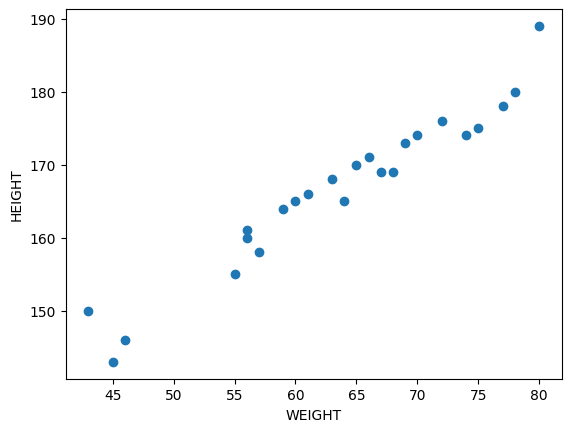

In [18]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('WEIGHT')
plt.ylabel('HEIGHT')


In [28]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.969869
Height,0.969869,1.000000


In [20]:
df.shape

(24, 2)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  24 non-null     int64
 1   Height  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [22]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [23]:
df.describe()

,Weight,Height
count,24.000000,24.000000
mean,63.583333,166.625000
std,10.274141,10.870033
min,43.000000,143.000000
25%,56.750000,160.750000
50%,64.500000,168.500000
75%,70.500000,174.000000
max,80.000000,189.000000


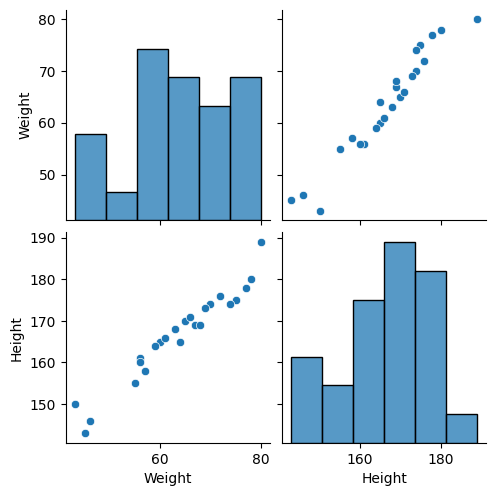

In [29]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [56]:
## independent and dependent features
X=df[['Weight']]  ### independent features should be datafram or 2-dimensional array
np.array(X).shape
X.head()
Y=df['Height']  ### can be in series form or 1-dimension array

In [42]:
X=df['Weight']
np.array(X).shape ## 1-dimension array

(24,)

In [53]:
X_series=df['Weight']
# np.array(X_series).shape
X_series.head()

0    45
1    55
2    43
3    56
4    78
Name: Weight, dtype: int64

In [55]:
Y

0     143
1     155
2     150
3     161
4     180
5     165
6     176
7     178
8     170
9     146
10    174
11    173
12    175
13    160
14    169
15    165
16    169
17    164
18    168
19    158
20    174
21    171
22    166
23    189
Name: Height, dtype: int64

In [58]:
np.array(Y).shape

(24,)

In [60]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [61]:
X_train.shape

(18, 1)

In [62]:
Y_train.shape

(18,)

In [63]:
Y_test.shape

(6,)

In [64]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)     ##used to avoid Data-Leakage

In [86]:
X_test = scaler.transform(X_test)



In [87]:
## Apply Simple Linear-Regression
from sklearn.linear_model import LinearRegression


In [93]:
regression = LinearRegression(n_jobs=-1)

In [94]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [100]:
print(regression.coef_)
print(regression.intercept_)

[9.16726696]
168.33333333333334


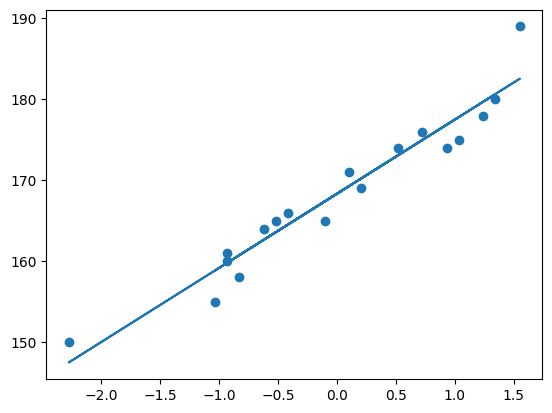

In [104]:
## Plot Training data plot best fit
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))


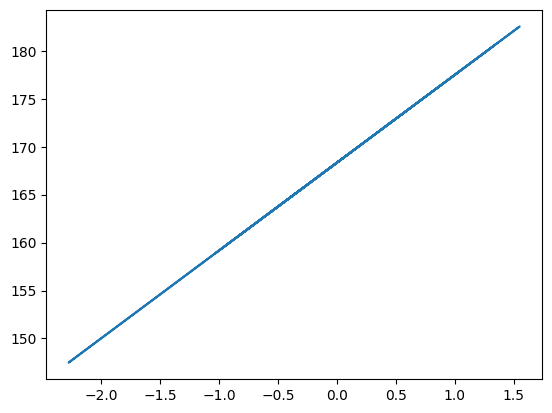

In [103]:
plt.plot(X_train,regression.predict(X_train))

In [105]:
## PRediction for test data
y_pred = regression.predict(X_train)

In [115]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse= mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

ValueError: ignored